<a href="https://colab.research.google.com/github/mingzhang1001/wpi-538/blob/master/PCA_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import scipy as stats
import scipy.stats as norm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA


In [0]:
# import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep=r"\s+", header=None) 


In [0]:
# set column headers
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
              "acceleration", "year", "origin", "name"]
df.columns = column_names


In [0]:
# convert "?" values to NaN
df = df.replace("?", np.nan)

# because horsepower was stored as an object variable it must now be converted to float
df.horsepower = df.horsepower.astype('float')


In [0]:
#drop all observations rows with NaN data
df = df.dropna()

In [0]:
#re-index the dataframe so that there are no missing row index numbers.  
df = df.reset_index(drop=True)

In [0]:
#store numeric data in new dataframe
df_num=df.iloc[:,0:8]

In [0]:
# standardize the data 
df_stdrd = (df_num-df_num.mean())/df_num.std()

#run PCA on standardized data
pca = PCA()
X_pca = pca.fit_transform(df_stdrd)



In [11]:
# df of components with total explaned variance column
pc_nums = list(range(1, X_pca.shape[1]+1))
for i in range(0, len(pc_nums)):   
  pc_nums[i]= "PC" + str(pc_nums[i])
  
comp_df = pd.DataFrame(pca.components_, columns=df_stdrd.columns, index=pc_nums)
comp_df["VARIANCE"] = pca.explained_variance_ratio_

round(comp_df,2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,VARIANCE
PC1,-0.39,0.40,0.42,0.40,0.40,-0.26,-0.21,-0.28,0.67
PC2,-0.08,-0.14,-0.13,0.11,-0.21,-0.42,-0.69,0.50,0.12
PC3,-0.29,-0.07,-0.07,-0.24,0.00,0.64,-0.59,-0.31,0.10
PC4,-0.10,0.22,0.14,0.12,0.32,0.49,0.11,0.74,0.06
PC5,-0.74,-0.48,-0.30,0.08,0.13,-0.10,0.30,0.05,0.02
PC6,0.39,-0.53,-0.01,0.67,0.24,0.20,-0.11,-0.12,0.01
PC7,-0.20,0.28,-0.08,0.54,-0.72,0.23,0.13,-0.03,0.01
PC8,-0.12,-0.42,0.83,-0.13,-0.31,0.04,0.05,0.08,0.00


In [12]:
# save transformed data to new df
df_pca = pd.DataFrame(data = X_pca, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

# merge original discrete variables onto dataframe
df_pca = pd.concat([df_pca, df], axis = 1)

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,2.714911,0.952554,0.213308,-0.521342,-0.785390,-0.471652,-0.105410,-0.118340,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,3.537071,1.060072,-0.035185,-0.335807,-0.501907,-0.001472,0.219649,0.068745,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,3.031289,1.165207,-0.148996,-0.649303,-0.748573,-0.218404,0.138576,-0.089153,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,2.977075,1.051376,0.167604,-0.464365,-0.554165,-0.244002,0.285564,-0.156733,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,2.966780,1.237705,-0.154744,-0.772740,-0.609509,-0.473343,-0.014991,-0.177286,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


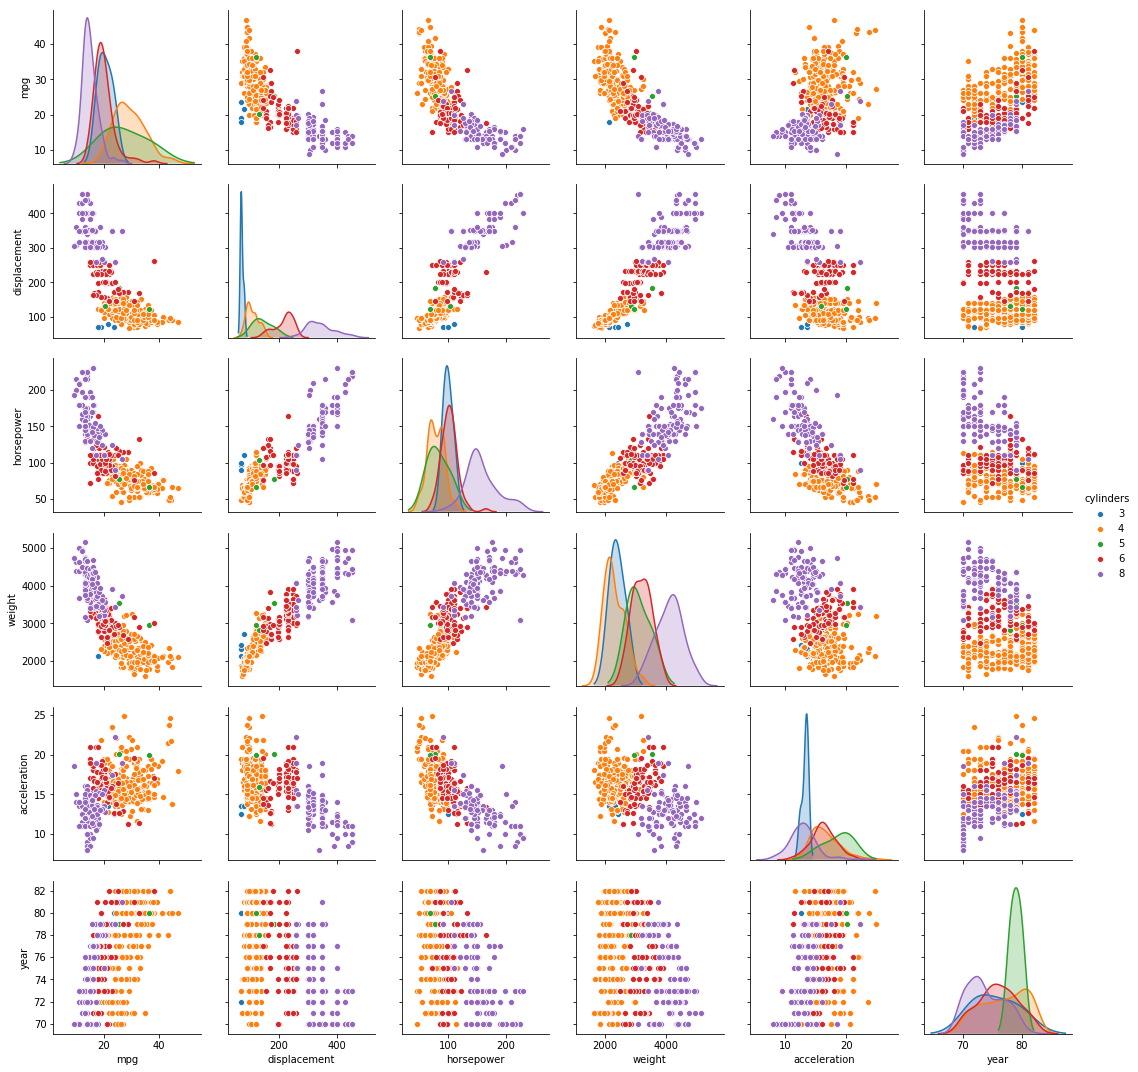

In [13]:
# pairwise plots for original attributes, grouping by cylinders
sns.pairplot(data=df, 
             vars=["mpg","displacement","horsepower","weight","acceleration","year"],
             hue="cylinders")


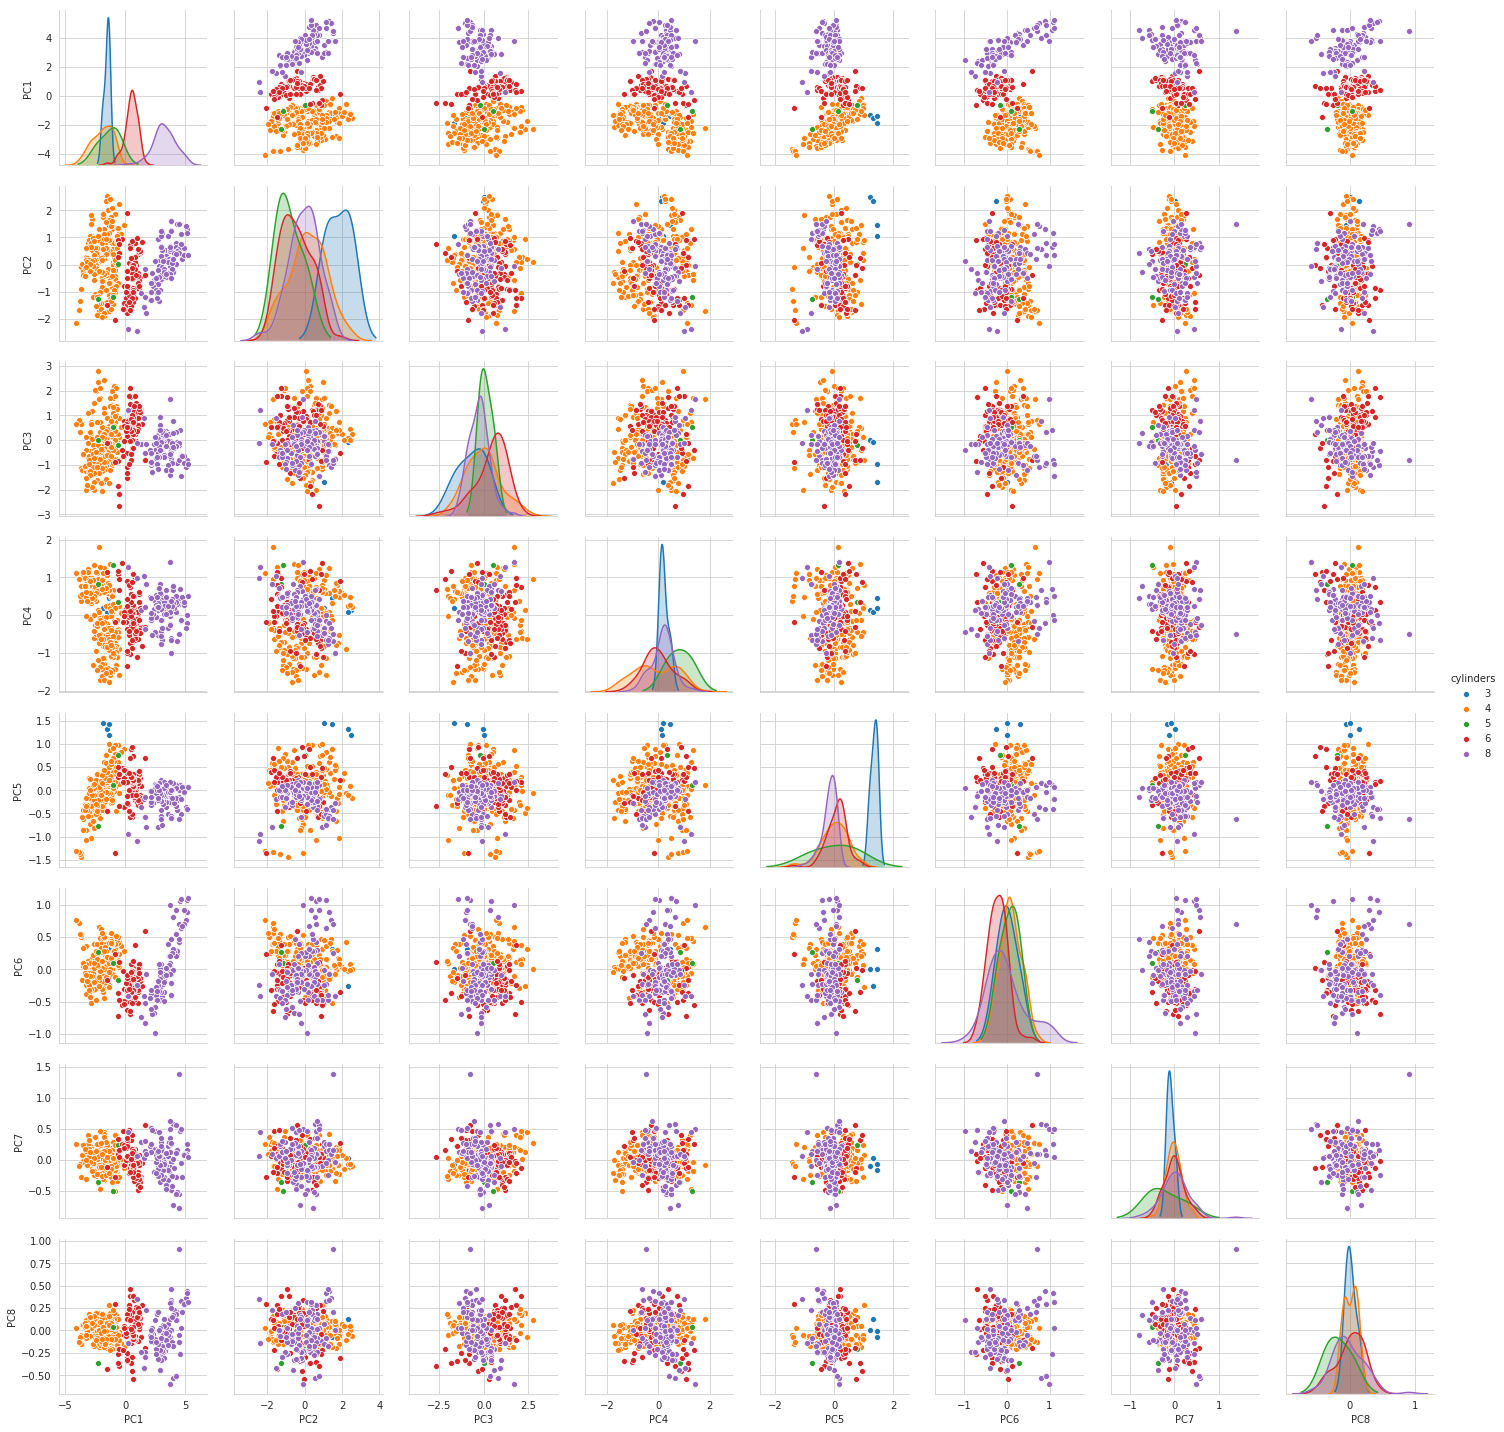

In [0]:
# pairwise plots for principal components, grouping by cylinders
sns.pairplot(data=df_pca, 
             vars=df_pca.columns[0:8], 
             hue="cylinders")

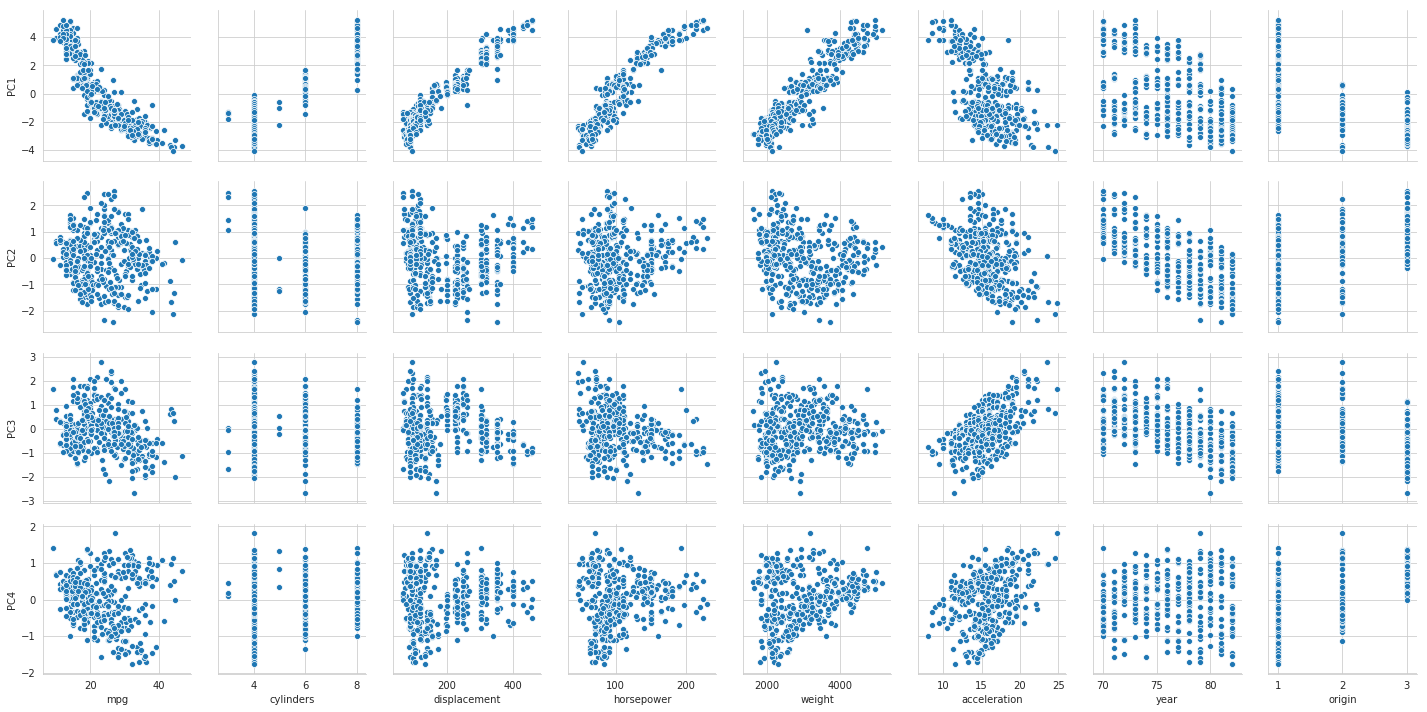

In [0]:
# pairwise plots comparing principal components to original attributes
sns.pairplot(data=df_pca, 
             x_vars=["mpg","cylinders","displacement","horsepower","weight","acceleration","year","origin"],
             y_vars=["PC1","PC2","PC3","PC4"])

In [0]:
# reminder of how much each PC is influenced by each original attribute
round(comp_df,2)